# **House Prices Study Notebook**

## Objectives

* Answer business requirement 1:
    * The client is interested to understand how different attributes affect Sale Price for houses generally in Ames, Iowa.

## Inputs

* Generate Dataset: outputs/datasets/collection/house_prices.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir         

'/workspaces/data-analytics-housing-project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/data-analytics-housing-project'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices.csv")
    )
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration

* We are interested in getting more familiar with the dataset, checking variable type and distribution, missing levels and what these variables mean in a business context.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* After reviewing the results of the profiling, the following columns were dropped for the Pearson and Spearman correlation studies due to high numbers of missing data and zeros.

In [6]:
df = df.drop(columns=['BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'GarageFinish', 'LotFrontage', 'MasVnrArea', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF'])

* Individual rows with missing data from the remaining columns are now dropped (from the Sheets analysis these rows belong to 'BedroomAbvGr', 'TotalBsmntArea' and 'GarageYearBlt').

In [7]:
df = df.dropna()
print("All rows containing missing data have now been removed.")


All rows containing missing data have now been removed.


* We started with 1,459 rows of data, after removing the columns with high levels of missing data or zeros, we then removed remaining rows that contained missing data. We will be using the remaining 1,283 rows for our correlation study (approx 88% of the houses).

In [8]:
df.index

Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            1446, 1447, 1448, 1451, 1452, 1454, 1455, 1457, 1458, 1459],
           dtype='int64', length=1283)

---

# Correlation Study

* Two of the columns in our dataset are objects. We need to use one hot encoder to convert their data into binary values.

In [9]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(10)

(1283, 22)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,GarageArea,GarageYrBlt,GrLivArea,LotArea,OverallCond,OverallQual,TotalBsmtSF,...,SalePrice,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,548,2003.0,1710,8450,5,7,856,...,208500,1,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,460,1976.0,1262,9600,8,6,1262,...,181500,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,608,2001.0,1786,11250,5,7,920,...,223500,0,0,1,0,0,1,0,0,0
4,1145,0.0,4.0,836,2000.0,2198,14260,5,8,1145,...,250000,0,0,0,1,0,1,0,0,0
5,796,566.0,1.0,480,1993.0,1362,14115,5,5,796,...,143000,1,0,0,0,0,0,1,0,0
6,1694,0.0,3.0,636,2004.0,1694,10084,5,8,1686,...,307000,0,0,0,1,0,1,0,0,0
7,1107,983.0,3.0,484,1973.0,2090,10382,6,7,1107,...,200000,0,0,1,0,0,0,1,0,0
8,1022,752.0,2.0,468,1931.0,1774,6120,5,7,952,...,129900,1,0,0,0,0,0,1,0,0
9,1077,0.0,2.0,205,1939.0,1077,7420,6,5,991,...,118000,1,0,0,0,0,0,1,0,0
10,1040,0.0,3.0,384,1965.0,1040,11200,5,5,1040,...,129500,1,0,0,0,0,0,1,0,0


* We use .corr() for spearman and pearson methods, and investigate the top 10 correlations.

* This command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with [1:]

* We sort values considering the absolute value, by setting key=abs

### Spearman Method

In [10]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.805878
GrLivArea         0.725952
YearBuilt         0.657581
GarageArea        0.613746
GarageYrBlt       0.604008
KitchenQual_TA   -0.603717
YearRemodAdd      0.587309
TotalBsmtSF       0.580552
1stFlrSF          0.554829
KitchenQual_Gd    0.468893
Name: SalePrice, dtype: float64

### Pearson Method

In [11]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.787379
GrLivArea         0.706602
GarageArea        0.609720
TotalBsmtSF       0.595456
1stFlrSF          0.586880
KitchenQual_TA   -0.532123
YearBuilt         0.519512
KitchenQual_Ex    0.511869
YearRemodAdd      0.511771
GarageYrBlt       0.496307
Name: SalePrice, dtype: float64

* Two values return strong correlation with Sale Price  -  Overall Quality (OverallQual relates to the houses' **material and finish** - as opposed to overall **condition** which is OverallCond) and Above Ground living area in square foot.

* The other correlation levels returned as moderate correlation (between 0.3-0.7)

* We will consider the top five correlation levels for both tests at df_ohe and will study the associated variables at df

In [12]:
top_n = 5
combined_list = corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()
significant_variables = set(combined_list)
print(significant_variables)


{'1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'GarageYrBlt', 'OverallQual', 'GrLivArea'}


Therefore, we are studying at df the following variables.

We will investigate if a houses' Sale Price is affected by:

* The square feet of above ground living area ('GrLivArea')
* The overall material quality and finishes of the house ('OverallQual')
* The year the basement was built ('GarageYrBlt')
* The area of square foot of the houses' first floor ('1stFlrSF')
* The year the house was built ('YearBuilt')
* The total square feet of a houses' basement ('TotalBsmtSF')
* The size of the houses' garage in square feet ('GarageArea')



In [13]:
vars_to_study = ['GrLivArea', 'OverallQual', 'GarageYrBlt', '1stFlrSF', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
vars_to_study

['GrLivArea',
 'OverallQual',
 'GarageYrBlt',
 '1stFlrSF',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageArea']

---

# EDA on Selected Variables

In [14]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,GrLivArea,OverallQual,GarageYrBlt,1stFlrSF,YearBuilt,TotalBsmtSF,GarageArea,SalePrice
0,1710,7,2003.0,856,2003,856,548,208500
1,1262,6,1976.0,1262,1976,1262,460,181500
2,1786,7,2001.0,920,2001,920,608,223500


### Linear Regression 

We plot the distribution of our selected variables individually in relation to our target variable; Sale Price.

#### Bivariate Analysis

First we conduct bivariate analysis. This will highlight the correlation visually between individual variables and our taarget variable and allow us to see outliers in our data.

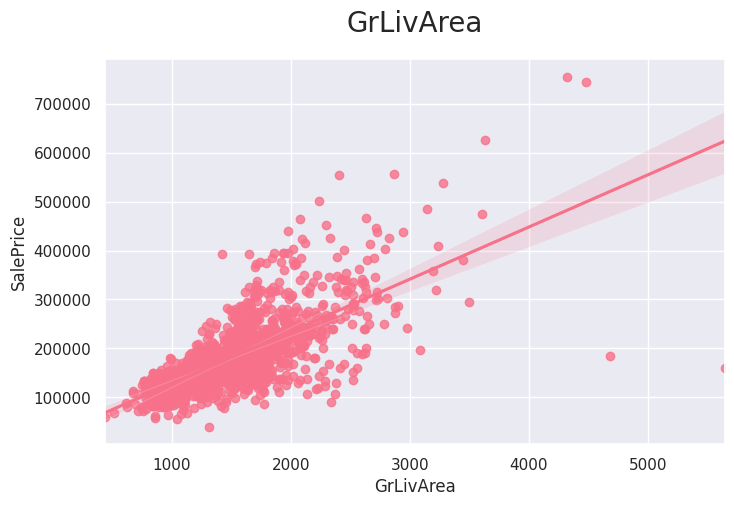

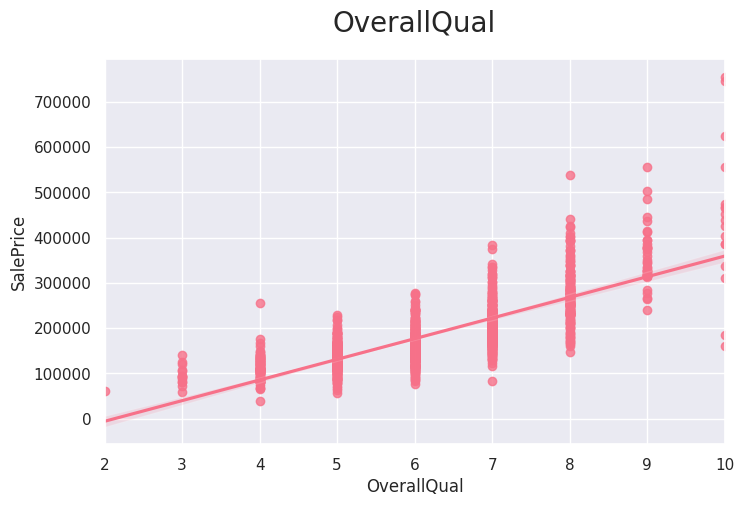

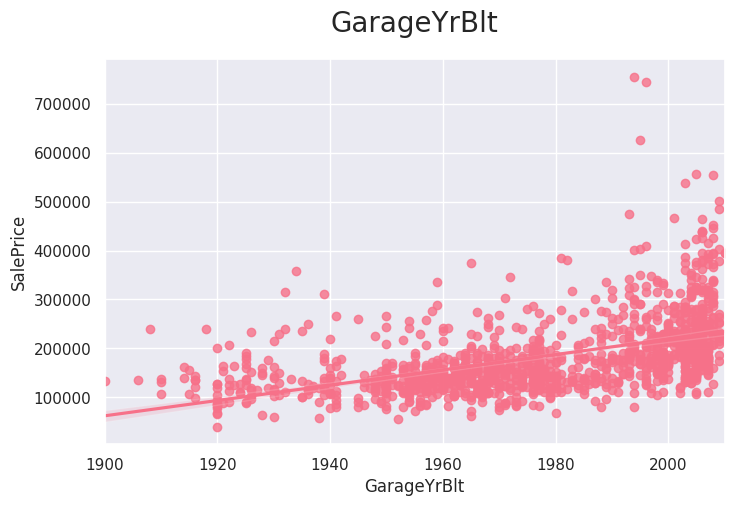

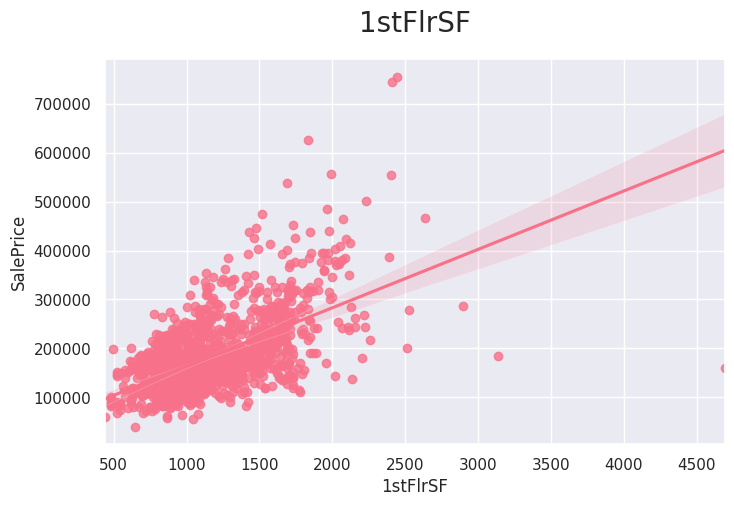

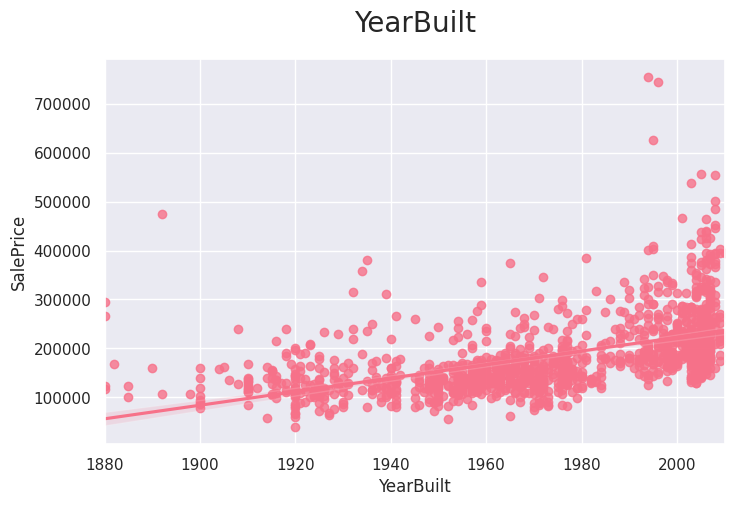

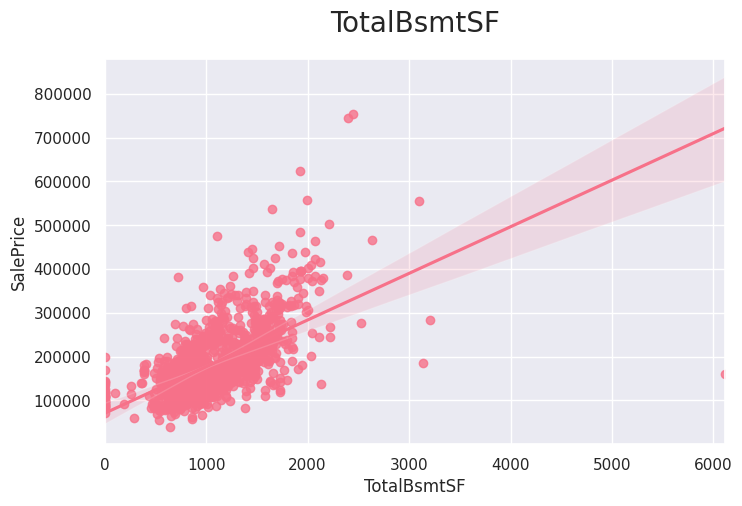

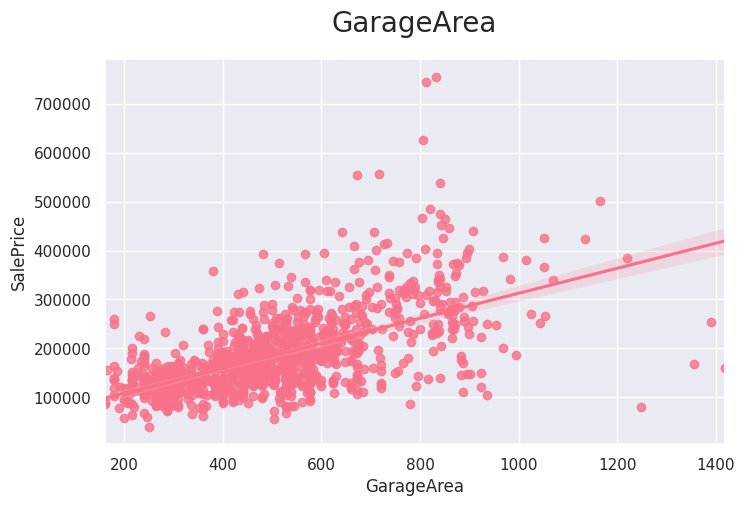

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='husl')


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=col, y=target_var) 
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
        plot_numerical(df_eda, col, target_var)
        print("\n")

#### Notes on the Bivariate Analysis

* There are significant outliers present in our dataset.

#### Multivariate Analysis

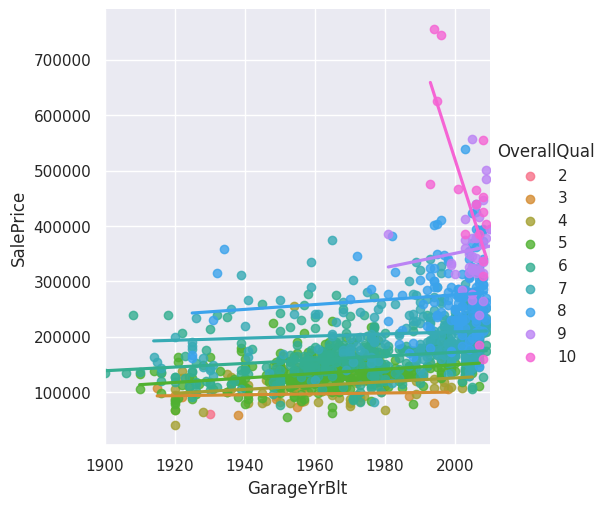

In [16]:
sns.lmplot(data=df, x="GarageYrBlt", y="SalePrice", ci=None, hue="OverallQual")
plt.show()

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions and Next Steps

Business question 1, which was explored in this Notebook, is "The client is interested in discovering how the house attributes correlate with the Sale Price and the client expects data visualisations of the correlated variables against the sale price to show that." 

To conclude:

* Sale Price for a house increases with an increase in ground floor living area ('GrLivArea') as well as first floor living area ('1stFlrSF.), however the latter displays a greater amount of outliers.
* Sale Price increases with the overall quality of the materials and finishing ('OverallQual')
* The year the house ('YearBuilt') and garage ('GarageYrBlt') were built appears to increase the Sale Price.
* House with larger basements ('TotalBsmtSF') and garages ('GarageArea') are generally shown to increase the Sale Price